In [56]:
import pandas as pd

_mnist = pd.read_csv('./datasets/mnist_train.csv')
_mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
import numpy as np

shuffle_idx = np.random.permutation(len(mnist))
mnist = _mnist.iloc[shuffle_idx]
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
5786,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21623,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23836,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24092,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(mnist, test_size=0.2, random_state=42)

train_labels = train_set['label']
train_data = train_set.drop('label', axis=1)

test_labels = test_set['label']
test_data = test_set.drop('label', axis=1)

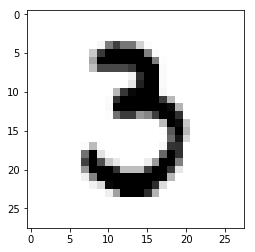

In [59]:
# exploration

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

train_data.head()
some_digit = train_data.iloc[0]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
          interpolation='nearest')

In [114]:
# binary classifier
from sklearn.linear_model import SGDClassifier as cur_model

# build all classifiers
classifiers = []
for i in range(10):
    is_x = (train_labels == i)
    model = cur_model(random_state=42)
    model.fit(train_data, is_x)
    classifiers.append((i, model))

/home/kdixler/code/ml/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/kdixler/code/ml/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/kdixler/code/ml/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

test_predictions = sgd_clf.predict(test_data)

accuracy = cross_val_score(sgd_clf, test_data, test_labels,
                               scoring='accuracy', cv=10)

accuracy

/home/kdixler/code/ml/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/kdixler/code/ml/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/kdixler/code/ml/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

array([0.86378738, 0.80548628, 0.86866168, 0.84455528, 0.84762698,
       0.80416667, 0.81385643, 0.87468672, 0.87207358, 0.85690377])

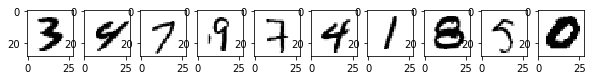

guess: [3, 4, 7, 3, 2, 4, 1, 3, 9, 0]
truth: [3, 4, 7, 9, 7, 4, 1, 8, 5, 0]


In [116]:
# aesthetic test

fig=plt.figure(figsize=(10,10))
classification = []
truth = []
options = np.random.permutation(len(test_data))
for idx in range(min(10, len(test_data))):
    some_digit = test_data.iloc[options[idx]]
    true_answer = test_labels.iloc[options[idx]]
    some_digit_image = some_digit.values.reshape(28, 28)
    fig.add_subplot(10, 10, idx+1)
    plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
              interpolation='none')
    
    prediction = None
    highest_confidence = None
    
    for number, model in classifiers:
        confidence = model.decision_function([some_digit])
        if highest_confidence == None or confidence > highest_confidence:
            prediction = number
            highest_confidence = confidence
        
    classification.append(prediction)
    truth.append(true_answer)
plt.show()
print('guess:', classification)
print('truth:', truth)

In [121]:
# makeshift binary classifier forest performance test
confidence_array = []
for number, model in classifiers:
    confidence = model.decision_function(test_data)
    confidence_array.append(confidence)
    
predictions = []
for idx in range(len(test_data)):
    prediction = max(((confidence_array[number][i], number) for number in range(10)))[1]
    predictions.append(prediction)

rmse = np.sqrt(mean_squared_error(test_labels, predictions))
rmse

3.8334492736089953

In [125]:
# real forest classifier

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(train_data, train_labels)

/home/kdixler/code/ml/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [128]:
cross_val_score(forest_clf, test_data, test_labels,
                    scoring='accuracy', cv=10)

array([0.90946844, 0.92103076, 0.92352452, 0.91188695, 0.9092423 ,
       0.91416667, 0.89148581, 0.90893901, 0.91053512, 0.92133891])

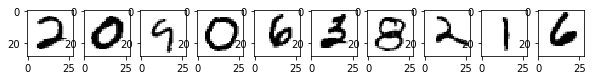

guess: [2, 0, 9, 0, 6, 3, 8, 2, 1, 6]
truth: [2, 0, 9, 0, 6, 3, 8, 2, 1, 6]


In [130]:
# aesthetic test

fig=plt.figure(figsize=(10,10))
classification = []
truth = []
options = np.random.permutation(len(test_data))
for idx in range(min(10, len(test_data))):
    some_digit = test_data.iloc[options[idx]]
    true_answer = test_labels.iloc[options[idx]]
    some_digit_image = some_digit.values.reshape(28, 28)
    fig.add_subplot(10, 10, idx+1)
    plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
              interpolation='none')
    
    classification.append(forest_clf.predict([some_digit])[0])
    truth.append(true_answer)
plt.show()
print('guess:', classification)
print('truth:', truth)

looks like random forest classifier completely wrecks a bunch of Binary Classifiers duct taped together probably because it can tell if another option is better and tells other classifiers that they're wrong, whereas duct-taped binary classifiers just argue with each other.